# 07 Sparse Multi Input example using the Abalone dataset

_[Estimated time of execution: 5 min]_

This notebook shows how to train a multi-input dataset using MOGPTK.

Abalone is a dataset containing the measurements of 4177 abalones (a type of marine snail) for their lengths, weights, sex and age. Specifically, the following features are given:

- Sex: M, F, and I (infant)
- Length in mm: longest shell measurement
- Diameter in mm: perpendicular to length
- Height in mm: with meat in shell
- Whole weight in grams: whole abalone
- Shucked weight in grams: weight of meat
- Viscera weight in grams: gut weight (after bleeding)
- Shell weight in grams: after being dried
- Rings: +1.5 gives the age in years

Here we will use the length and weight features as independent variables, and the number of rings (i.e. their age) as the dependent variable.

In [10]:
import numpy as np
import mogptk

Load in the dataset and select the relevant columns. Then standardize the number of rings so that it has zero mean and unit variance.

In [11]:
columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]

data = mogptk.LoadCSV("data/abalone/abalone.data",
                      x_col=["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"],
                      y_col=["Rings"], names=columns)
data.transform(mogptk.TransformNormalize())

Set up the model by using Titsias' sparse Gaussian process inference with a `100` inducing (sparse) points. The initial points will be spread randomly over the input space.

We will use the squared exponential kernel with our 7 input dimensions. We initialize the parameters to values that are close to the minimum to help training.

In [13]:
# Choose kernel
kernel = mogptk.gpr.SquaredExponentialKernel(input_dims=7)

# Choose inference
inference = mogptk.Titsias(inducing_points=100, init_inducing_points='random')

# Set up model
model = mogptk.Model(data, kernel, inference=inference)

# Initialize parameters
model.gpr.kernel.lengthscale.assign(np.random.rand(7))

Training will be performed using the default Adam optimizer with a learning rate of `1.0` for a `100` iterations. We will additionally be measuring the error between the prediction and the target values using the mean absolute percentage error (MAPE), which is a relative error with respect to the target values. In our case, we are able to reach a 16% error relative to the target values.


Starting optimization using Adam
‣ Channels: 1
‣ Parameters: 709
‣ Training points: 4177
‣ Initial loss: 6126.56
‣ Initial error: 47.3229

Start Adam:
    0/100   0:00:00  loss=     6126.56  error=     47.3229
    1/100   0:00:00  loss=     6120.71  error=     68.9888
    2/100   0:00:01  loss=     5971.82  error=     69.3777
    3/100   0:00:01  loss=     5804.55  error=     69.3452
    4/100   0:00:02  loss=     5618.33  error=     66.8451
    5/100   0:00:02  loss=     5474.17  error=     68.8705
    6/100   0:00:03  loss=     5133.53  error=     50.8475
    7/100   0:00:04  loss=     5049.64  error=     53.3974
    8/100   0:00:05  loss=     4847.99  error=     49.6542
    9/100   0:00:05  loss=     4266.26  error=     29.7818
   10/100   0:00:06  loss=     4094.61  error=      23.752
   11/100   0:00:07  loss=     3907.53  error=     24.8311
   12/100   0:00:08  loss=     3211.78  error=     23.6807
   13/100   0:00:08  loss=     3475.56  error=     29.3339
   14/100   0:00:09  l

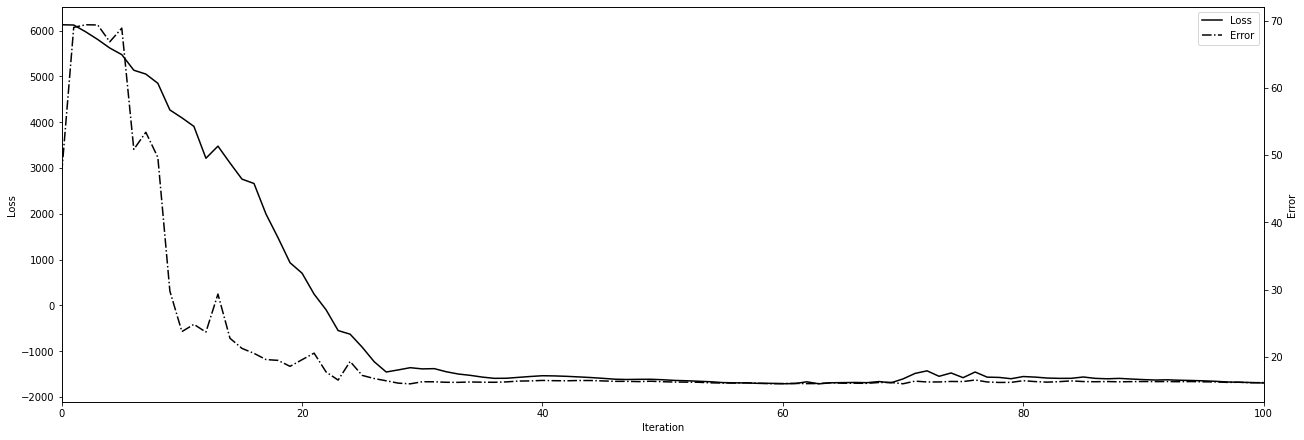

In [14]:
model.train(iters=100, verbose=True, error='mape', lr=1.0)
model.plot_losses();

The loss and error decline rapidly and consistently, confirming that training was succesfull. The following kernel and model parameters have been obtained.

In [15]:
model.print_parameters()